<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [27]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [28]:
from bs4 import BeautifulSoup
import requests

##### Your Code Here #####
df = pd.read_csv('./data/job_listings.csv')
df

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist
...,...,...,...
421,421,"b""<b>About Us:</b><br/>\nWant to be part of a ...",Senior Data Science Engineer
422,422,"b'<div class=""jobsearch-JobMetadataHeader icl-...",2019 PhD Data Scientist Internship - Forecasti...
423,423,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist - Insurance
424,424,"b""<p></p><div><p>SENIOR DATA SCIENTIST</p><p>\...",Senior Data Scientist


In [29]:
df = df.drop(columns = 'Unnamed: 0')

def clean_description(desc):
    soup = BeautifulSoup(desc)
    return soup.get_text()

df['clean_desc'] = df['description'].apply(clean_description)
df['clean_desc'] = df['clean_desc'].apply(lambda x: x[2:].replace("\\n", " "))

df.head()

,description,title,clean_desc
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,Job Requirements: Conceptual understanding in ...
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"Job Description As a Data Scientist 1, you wi..."
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,As a Data Scientist you will be working on con...
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"$4,969 - $6,756 a monthContractUnder the gener..."
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,Location: USA \xe2\x80\x93 multiple locations ...


In [30]:
df['clean_desc']

0      Job Requirements: Conceptual understanding in ...
1      Job Description  As a Data Scientist 1, you wi...
2      As a Data Scientist you will be working on con...
3      $4,969 - $6,756 a monthContractUnder the gener...
4      Location: USA \xe2\x80\x93 multiple locations ...
                             ...                        
421    About Us: Want to be part of a fantastic and f...
422    InternshipAt Uber, we ignite opportunity by se...
423    $200,000 - $350,000 a yearA million people a y...
424    SENIOR DATA SCIENTIST JOB DESCRIPTION  ABOUT U...
425    Cerner Intelligence is a new, innovative organ...
Name: clean_desc, Length: 426, dtype: object

## 2) Use Spacy to tokenize the listings 

In [31]:
##### Your Code Here #####
# raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

nlp = spacy.load("en_core_web_lg")

lemmas = []

for doc in nlp.pipe(df['clean_desc']):
    
    d_lems = []
    
    for token in doc:
        if ((token.is_stop == False) and (token.is_punct == False)) :
            d_lems.append(token.lemma_)
    lemmas.append(d_lems)
    
df['tokens'] = lemmas

In [32]:
df.head()

,description,title,clean_desc,tokens
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,Job Requirements: Conceptual understanding in ...,"[job, requirement, conceptual, understanding, ..."
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"Job Description As a Data Scientist 1, you wi...","[job, description, , Data, scientist, 1, help..."
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,As a Data Scientist you will be working on con...,"[Data, scientist, work, consult, business, res..."
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"$4,969 - $6,756 a monthContractUnder the gener...","[$, 4,969, $, 6,756, monthcontractunder, gener..."
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,Location: USA \xe2\x80\x93 multiple locations ...,"[location, USA, \xe2\x80\x93, multiple, locati..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [33]:
##### Your Code Here #####
# raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(stop_words='english')

vect.fit(df['clean_desc'])

dtm = vect.transform(df['clean_desc'])

dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

dtm

,00,000,02115,03,0305,0356,04,062,06366,08,...,zero,zeus,zf,zheng,zillow,zogsports,zones,zoom,zuckerberg,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
423,0,2,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

In [35]:
##### Your Code Here #####
# raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."
from collections import Counter

def count(docs):
    word_counts = Counter()
    appears_in = Counter()
    
    total_docs = len(docs)
    
    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))
    
    temp = zip(word_counts.keys(), word_counts.values())
    wc = pd.DataFrame(temp, columns=['word', 'count'])
    
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    
    total = wc['count'].sum()
    
    wc['total_pct'] =  wc['count'].apply(lambda x: x / total)
    
    wc = wc.sort_values(by='rank')
    wc['cum_pct_total'] = wc['total_pct'].cumsum()
    
    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc , on='word')
    
    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
    
    return wc.sort_values(by='rank')

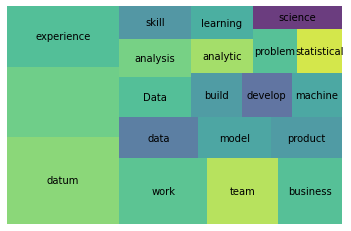

In [36]:
import squarify
import matplotlib.pyplot as plt

wc = count(df['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['total_pct'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [37]:
# Extending stop words
STOP_WORDS = nlp.Defaults.stop_words.union([" ", "data", "Data", "science"])

In [40]:
lemmas = []

for doc in nlp.pipe(df['clean_desc']):
    
    d_lems = []
    
    for token in doc:
        if ((token.is_stop == False) and (token.is_punct == False) and (token.text.lower() not in STOP_WORDS)) :
            d_lems.append(token.lemma_)
    lemmas.append(d_lems)
    
df['tokens'] = lemmas

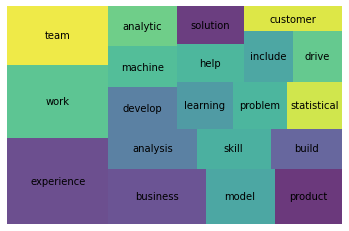

In [41]:
wc = count(df['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['total_pct'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [56]:
def tokenize(document):
    
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop == False) and (token.is_punct == False) and (token.text.lower() not in STOP_WORDS)]

In [57]:
##### Your Code Here #####
# raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

from sklearn.feature_extraction.text import TfidfVectorizer



tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_df=.95, min_df=2, max_features=5000, tokenizer=tokenize)

dtm = tfidf.fit_transform(df['clean_desc'])

dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

dtm

,,5,experience,$,+,+ year,+ years\xe2\x80\x99,+ yrs,0,0 2,...,you\xe2\x80\x99ll need,you\xe2\x80\x99ll partner,you\xe2\x80\x99ll work,you\xe2\x80\x99re,you\xe2\x80\x99re look,you\xe2\x80\x99ve,yrs,zf,|,||
0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.000000,0.028044,0.030612,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.242796,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.000000,0.122279,0.133479,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0.055372,0.0,0.0,0.036235,0.044956,0.049074,0.0,0.0,0.0,0.0,...,0.051756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
422,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
423,0.000000,0.0,0.0,0.100418,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
424,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [59]:
##### Your Code Here #####
# raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [63]:
dream_job = ['''
At Uber, we ignite opportunity by setting the world in motion. We take on big problems to help drivers, riders, delivery partners, and eaters get moving in more than 600 cities around the world.

We welcome people from all backgrounds who seek the opportunity to help build a future where everyone and everything can move independently. If you have the curiosity, passion, and collaborative spirit, work with us, and let’s move the world forward, together.

About The Role

Data scientists in this role sit at the intersection of data science, economics, and the law. They partner with the Legal team globally and use their understanding of Uber data and the Uber platform to answer legal questions and inform legal arguments with data. As part of this work, they analyze large datasets, create data pipelines, and build statistical models.

What You’ll Do
Build a deep, nuanced understanding of Uber’s large and unique data as well as its platform and communicate this understanding to lawyers, regulators, and other stakeholders
Propose, design, and execute data analyses, data pipelines, and statistical models to inform, enrich, and advance the work of our Legal Team and other teams across the company
Work in an inclusive and diverse team of data scientists who will support your development as a data scientist and who, in turn, you will influence and shape

What You’ll Need
Minimum 1 year of experience (including graduate work) in data science or a similar quantitative field; experience and/or interest in legal and economic issues is a plus but not required
Experience using and picking up new data science tools to query (e.g., SQL, Hive), analyze (e.g., Python, R), and model (e.g., scikit-learn, statsmodels) data at scale
Ability to collaborate and communicate well: building and managing relationships with clients, communicating with non-technical audiences, and collaborating with cross-functional partners
Ability to own and drive projects independently: balancing excellence and attention to detail with the need to prioritize work and deliver within sometimes tight deadlines

What You’ll Get
Be part of the technology company whose platform is used globally by over 4 million people to earn money and over 100 million people to move around their cities
Join a supportive, inclusive company and team that will be invested in you and your professional growth and success as a data scientist
Get exposure to a unique set of clients and projects: Your work will influence legal work carried out across the company and around the world

About The Team

Legal Data Science works with the Legal Team on Uber’s most important legal issues. We partner with the Legal team to develop analyses and arguments—based on data science, economics, and the law—that help set business strategy and inform legal positions.

Industry
Computer Software  Consumer Services  Information Technology & Services
Employment Type
Full-time

Job Functions
Engineering  Information Technology''']

In [64]:
new = tfidf.transform(dream_job)

In [66]:
nn.kneighbors(new.todense())

(array([[1.18997076, 1.20087615, 1.22033237, 1.23945383, 1.23955992]]),
 array([[322, 128, 191, 422, 310]]))

In [75]:
df['clean_desc'][322]

'At Uber, we ignite opportunity by setting the world in motion. We take on big problems to help drivers, riders, delivery partners, and eaters get moving in more than 600 cities around the world.  We welcome people from all backgrounds who seek the opportunity to help build a future where everyone and everything can move independently. If you have the curiosity, passion, and collaborative spirit, work with us, and let\\xe2\\x80\\x99s move the world forward, together.   What You\'ll Do Design experiments to evaluate the optimization in the rider-partner marketplace Develop statistical models/analysis and apply them into solving real-time problems Partner with Software Engineering and Product Management teams to create internal infrastructure and programs in a large scale Communicate with product teams and turn hard and abstract into simple and approachable Define key business metrics for experimentation and running large scale experiments that deliver impactful results to the business C

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 